In [2]:
"""
Santosh Omprakash
"""

'\nSantosh Omprakash\n'

## Credit card fraud detection

### Problem Statement:
In financial industry, fraud is a major threat which leads in financial loss. Credit card fraud results in millions of dollars loss to the banks and/or financial institution. Fraudsters find new ways to conduct fraud in credit card transaction. Losses to financial institution can be avoided by detecting credit card fraud and alerting banks about potential fraudulent transactions. 

### Proposal:
By using credit card fraud dataset, firstly I will perform some graph analysis to understand some trends in the dataset. The dataset may be imbalanced which might result in false positive or false negative fraud detection. Hence may need to perform scaling on the dataset. I will be using machine learning algorithms to detect the fraudulent transactions. 

In [87]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from numpy import mean, std
import scikitplot as skplt
from sklearn.metrics import log_loss, average_precision_score, make_scorer

In [4]:
# Read credit card fraud dataset
df = pd.read_csv("creditcard.csv")

In [5]:
# Check the dimension
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (284807, 31)


In [6]:
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#### Columns V1 to V28 are result of Principal Component Analysis (PCA) which has been done due to data compliance.
#### Amount is the Transaction amount 
#### Class 0 indicates non-fraud and 1 indicates fraud
#### Time is the time elapsed between each transaction

In [41]:
# Check if any missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### No null values in the dataset

Text(0.5, 1.0, '0: Not Fraud, 1: Fraud')

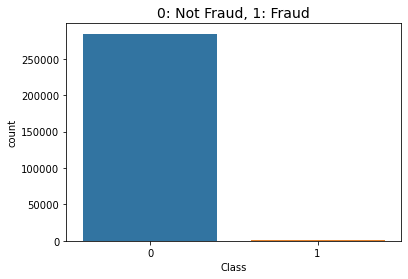

In [42]:
# Graph Analysis
# Bar plot of count of fraud vs non-fraud transactions in the dataset
sns.countplot('Class', data=df)
plt.title('0: Not Fraud, 1: Fraud', fontsize=14)

In [45]:
# Seperate fraud and non-fraud for histogram
frd_class = df[df.Class == 1]
non_frd_class = df[df.Class == 0]

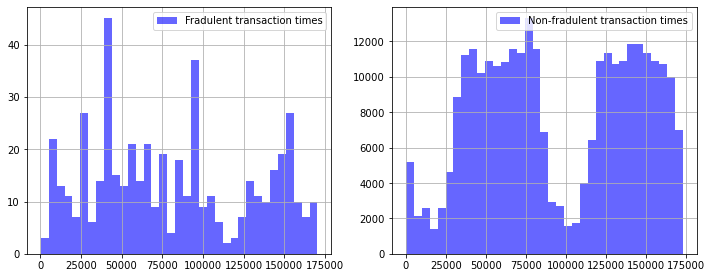

In [49]:
# Histogram of transaction times in fradulent and non-fradulent transactions
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
frd_class.Time.hist(bins=35, color='blue', alpha=0.6, label="Fradulent transaction times")
plt.legend()

plt.subplot(2, 2, 2)
non_frd_class.Time.hist(bins=35, color='blue', alpha=0.6, label="Non-fradulent transaction times")
plt.legend()

From above, fradulent transaction shows couple of peak times but it can be observed that time of the trasaction cannot be considered much in the analysis to determine if the transaction is fraudlent or not. 

In [7]:
# Train and test data
X=df.drop(columns=["Time","Class"],axis="columns")
y=df.Class

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [9]:
X_train.shape

(227845, 29)

In [10]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(X_train,y_train)
X_train_var=var.transform(X_train)
X_test_var=var.transform(X_test)

In [11]:
X_train_var.shape

(227845, 23)

In [12]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [13]:
variance_threshold_selector(X_train, 0.5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,9.99
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,45.90
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,11.99
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,117.44
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,0.600937,0.658885,0.239566,-0.356782,-0.410923,-0.182494,-0.157534,-0.186027,-0.574283,1.98
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,0.384625,0.785702,0.057999,-0.462528,-0.063197,0.094703,-0.295730,0.037078,-0.019575,89.23
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,-0.019493,0.690200,-0.144778,-0.539887,-0.068375,-0.229614,0.007155,0.052649,0.354089,3.94
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,0.927786,-0.090065,0.426113,-0.396148,-0.946837,-1.143752,0.417396,-0.332759,-1.047514,1.00


In [14]:
varth_features=var.get_support()
varth_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True])

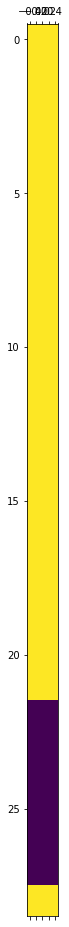

In [15]:
plt.matshow(varth_features.reshape(-1,1))

Variance threshold is calculated based on probability density function of a particular distribution. 
If a feature has 95% or more variability then is very close to zero and the feature may not help in the model prediciton and it can be removed. The values with True are the features selected using Variance threshold technique. The columns from V23 to V28 are removed.

In [16]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=10)
skbest.fit(X_train,y_train)
X_train_skbest=skbest.transform(X_train)
X_test_skbest=skbest.transform(X_test)

In [17]:
X_train_skbest.shape

(227845, 10)

In [18]:
kbest_features=skbest.get_support()
kbest_features

array([False, False,  True,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [19]:
# SelectKBest to determine 10 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print 10 best features

   Feature_Name         Score
16          V17  27240.806212
13          V14  23547.660704
11          V12  16985.532943
9           V10  11096.188557
15          V16   9239.509953
2            V3   8425.516128
6            V7   7782.311282
10          V11   5680.321617
3            V4   4173.023409
17          V18   2865.506910


The values with True are the features selected using SelectKBest technique. Most relevant 10 features are selected. The features selected can be tested by running throught the model.

In [50]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [51]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [52]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

Variance threshold returned 23 features and I'll be using this training and test data for further process 

In [53]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(X_train_var, y_train, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


From above, the baseline score is 0.50. Hence the model selected should be atleast above this score. 

Since the values are of PCA transformation, it is better to normalize the data as it could impact the performance of the model.

In [54]:
# Normalize the input
scaler = StandardScaler()
scaler.fit(X_train_var)
X_train_norm = scaler.transform(X_train_var)
X_test_norm = scaler.transform(X_test_var)

Model selection - One of the common models is Logistic regression. Few other models are compared to see the results. Cross validation method is used.

In [55]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [56]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.94 (+/- 0.02)
Score: 0.88 (+/- 0.03)
Score: 0.98 (+/- 0.01)
Score: 0.98 (+/- 0.01)


,roc_auc
RandomForestClassifier,0.943755
DecisionTreeClassifier,0.879323
SGDClassifier,0.980483
LogisticRegression,0.977406


From above, Random Forest Classifier and Decision Tree Classifier have better scores. I will be working on testing and validating the models in coming week. 

### Random Forest Model Evaluation

In [57]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

As the time taken to process the large dataset is more, just specified the number of estimators instead of hyperparameter grid search. 

In [58]:
parm_gridscv_rf = {'model__n_estimators': [75]}

In [59]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [60]:
grid_rf.fit(X_train_norm, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [61]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,163.587383,1.105021,0.695453,0.357422,75,{'model__n_estimators': 75},0.953661,0.948029,0.92267,0.96075,0.948151,0.946652,0.012862,1


In [62]:
grid_rf.best_score_, grid_rf.best_params_

(0.9466523268247682, {'model__n_estimators': 75})

### Test Random Forest model

In [81]:
y_pred = grid_rf.predict(X_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(X_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[56861     3]
 [   21    77]] 

Classification report
              precision    recall  f1-score   support

           0    0.99963   0.99995   0.99979     56864
           1    0.96250   0.78571   0.86517        98

    accuracy                        0.99958     56962
   macro avg    0.98107   0.89283   0.93248     56962
weighted avg    0.99957   0.99958   0.99956     56962

Scalar Metrics
        AUROC = 0.95824


### Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [89]:
log_loss(y_test, y_pred)

0.014552386367581962

### Logistic Regression Model Evaluation

In [83]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(X_train_norm, y_train)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=1, penalty='l2', random_state=101,
                   solver='lbfgs', tol=1e-05, verbose=0, warm_start=False)
The best classifier score: 0.9753252317330124


### Test Logistic Regression Model

In [84]:
y_pred1 = clf.predict(X_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(X_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[56855     9]
 [   40    58]] 

Classification report
              precision    recall  f1-score   support

           0    0.99930   0.99984   0.99957     56864
           1    0.86567   0.59184   0.70303        98

    accuracy                        0.99914     56962
   macro avg    0.93248   0.79584   0.85130     56962
weighted avg    0.99907   0.99914   0.99906     56962

Scalar Metrics
        AUROC = 0.98116


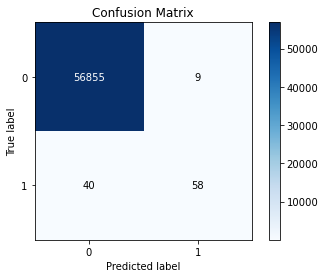

In [85]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1)

In [88]:
log_loss(y_test, y_pred1)

0.02971116252462259